<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Aproximaci%C3%B3n_Integral_MC_Acierto_y_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO 1**. Defina las variables que intervienen en el modelo.

$x1, x2$ : variables aleatorias en el intervalo [0, 1]

**PASO 2**. Formule la distribución de probabilidad de cada variable.

|      | $x1 ∼ U(0,1)$ | $x2 ∼ U(0,1)$ |
|------|----------------|---------------|
|$f(x)$|  $$1$$ |  $$1$$ |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|        |$ x1∼U(0,1) $|$ x2∼U(0,1) $|
|--------|-------------|-------------|
|$$f(x)$$|    $$1$$    |    $$1$$    |
|$$F(x)$$|    $$x$$    |    $$x$$    |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|         |$x1 ∼ U(0,1)$|$x2 ∼ U(0,1)$|
|---------|-------------|-------------|
|$$f(x)$$ |    $$1$$    |    $$1$$    |
|$$F(x)$$ |    $$x$$    |    $$x$$    |
|intervalo|  $$[0,1]$$  |  $$[0,1]$$  |

**PASO 5**. Genere números aleatorios.

In [1]:
from random import random
x1, x2 = random(), random()

**PASO 6**. Simule un lanzamiento.

Si $cx_2 < g(x_1) ⇒ $ Acierto

Si $cx_2 \geq g(x_1) ⇒ $ Error

donde $g(x)$ es la función que se desea integrar. Con $0<g(x)<c$, $∀x∈[0,1]$


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

In [2]:
from random import random
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
@jit(nopython = True)
def g(x):
  return np.exp(np.exp(x))

In [4]:
@jit(nopython = True)
def aprox_int(n, g, c, a=0, b=1, p = 1):
  cuenta = 0
  l = list()
  for i in range(1, n+1):
    r_1, r_2 = random(), random()
    x = a + r_1 * (b-a)
    if  g(x) > c*r_2:
      cuenta +=1
    if i%p == 0:
      l.append(c * (b-a) * cuenta/i)
  return l

la aproximación del resultado de la integral con 500 iteraciones es 6.607258337284959
la aproximación del resultado de la integral con 500 iteraciones es 5.698002602796203
la aproximación del resultado de la integral con 500 iteraciones es 5.8192367007280374
la aproximación del resultado de la integral con 500 iteraciones es 6.304173092455373


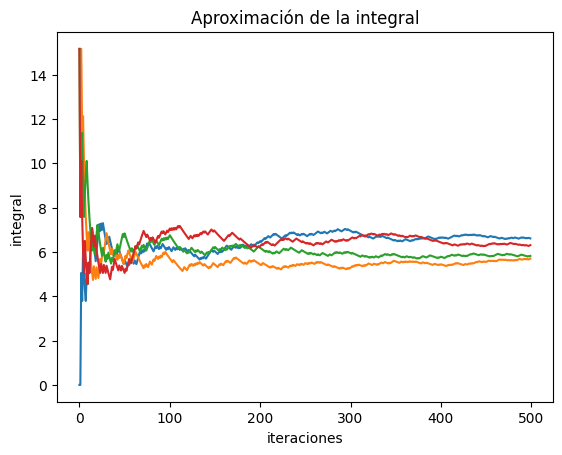

In [5]:
iter = 500
for i in range(4):
  exp = aprox_int(iter, g, c = max(g(0), g(1)))

  print(f"la aproximación del resultado de la integral con {iter} iteraciones es {exp[-1]}")
  # print(np.mean(exp))

  plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('integral')
plt.title('Aproximación de la integral')
plt.show()

Como se observa en la gráfica anterior, la cantidad de iteraciones necesarias para alcanzar el estado estable es aproximadamente 300

**PASO 8**. Replique el modelo.

In [6]:
def replicar(cant_replicas, iter):
    rep = list()
    for i in range(cant_replicas):
      aprox = aprox_int(iter, g, c = max(g(0), g(1)))
      rep.append(np.mean(aprox))
    return rep

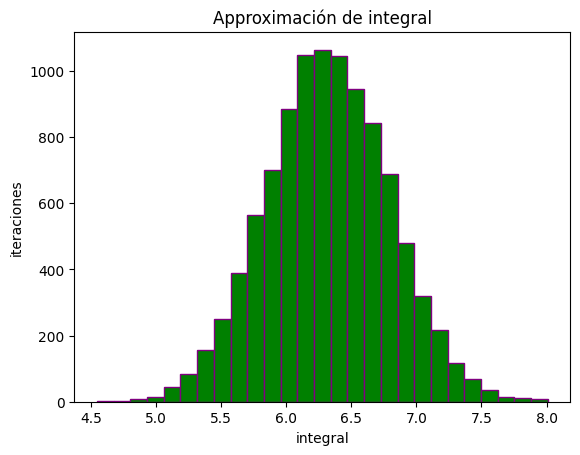

In [7]:
r = 10000
i = 500
sim = replicar(r, i)

plt.hist(sim, bins = 27, color = "g", edgecolor = 'purple')
plt.xlabel('integral')
plt.ylabel('iteraciones')
plt.title('Approximación de integral')
# plt.ylim(0,1)
plt.show()

**PASO 9**. Calcule la una aproximación a la integral definida, así como la variación de las aproximaciones.


In [8]:
med = np.mean(sim)
var = np.var(sim, ddof=1)
desv = np.std(sim, ddof=1)

print(f"pi(aprox) = media = {med}")
print(f"varianza = {var}")
print(f"deviación estandar = {desv}\n")

pi(aprox) = media = 6.320550596811032
varianza = 0.22194560154952883
deviación estandar = 0.4711110288982087



**PASO 10**. Halle el intervalo de confianza de la aproximación de la integlar definida con un nivel de confianza del $95 \%$.

In [9]:
z = norm.ppf(0.975)
l_inf = med - z*desv/np.sqrt(r)
l_sup = med + z*desv/np.sqrt(r)
print(f"El intervalo de confianza del 95% es [{l_inf}, {l_sup}]")

z = norm.ppf(0.95)
l_inf = med - z*desv/np.sqrt(r)
l_sup = med + z*desv/np.sqrt(r)
print(f"El intervalo de confianza del 90% es [{l_inf}, {l_sup}]")

z = norm.ppf(0.995)
l_inf = med - z*desv/np.sqrt(r)
l_sup = med + z*desv/np.sqrt(r)
print(f"El intervalo de confianza del 99% es [{l_inf}, {l_sup}]")

z = norm.ppf(0.90)
l_inf = med - z*desv/np.sqrt(r)
l_sup = med + z*desv/np.sqrt(r)
print(f"El intervalo de confianza del 80% es [{l_inf}, {l_sup}]")

El intervalo de confianza del 95% es [6.31131699031743, 6.329784203304633]
El intervalo de confianza del 90% es [6.312801509965231, 6.328299683656832]
El intervalo de confianza del 99% es [6.308415580876421, 6.332685612745642]
El intervalo de confianza del 80% es [6.314513066044733, 6.32658812757733]
